## Linear Regression with Boston House Prices dataset

In [71]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

### Load dataset and exploration

In [6]:
X, y = boston.data, boston.target

### Show the dataset descriptition

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Plot the house price (MEDV) wtih regard to different features

In [38]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

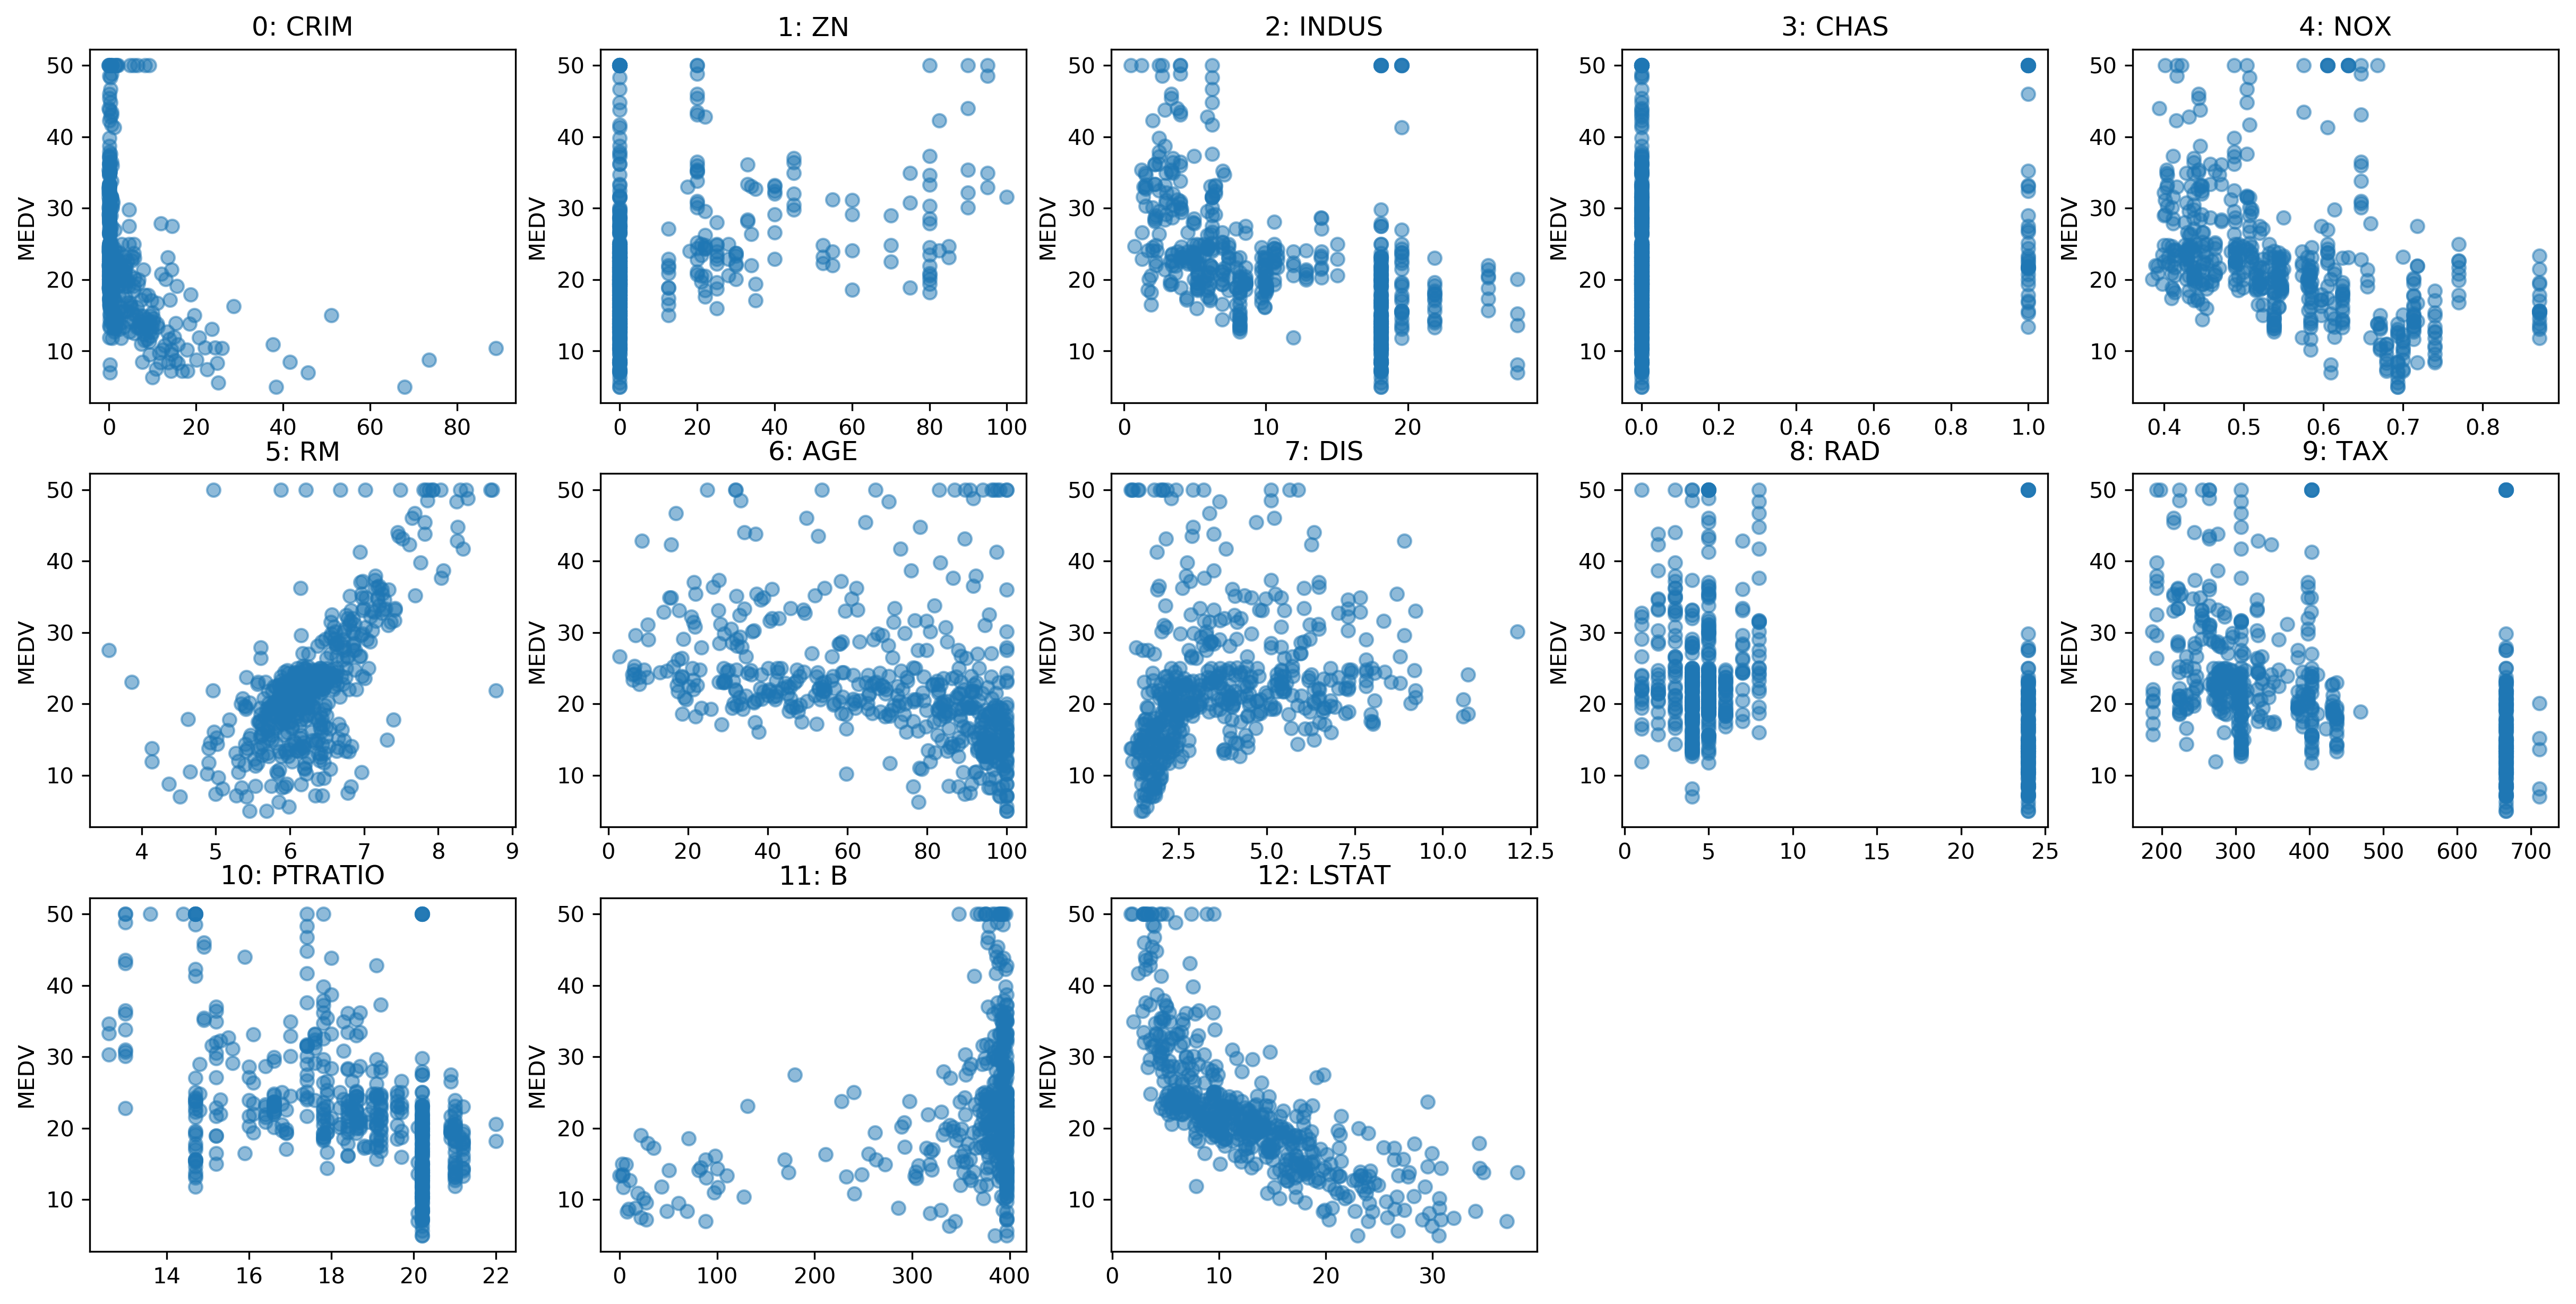

In [39]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 13)
(506,)
(379, 13)
(379,)
(127, 13)
(127,)


## Linear Regression: The syntax
#### Import the class containing the regression method

In [ ]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the class

In [17]:
linreg=LinearRegression()

#### Fit the instance on the data 

In [24]:
linreg.fit(X_train, y_train)
# To disable the output use
# linreg=linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Show the model parameters (coefficients and intercept)

In [19]:
print("linreg.coef_: {}".format(linreg.coef_))
print("linreg.intercept_: {}".format(linreg.intercept_))

linreg.coef_: [-1.27824912e-01  2.95208977e-02  4.92643105e-02  2.77594439e+00
 -1.62801962e+01  4.36089596e+00 -9.19111559e-03 -1.40172019e+00
  2.57458956e-01 -9.94705777e-03 -9.24266403e-01  1.33164215e-02
 -5.18565634e-01]
linreg.intercept_: 29.883345627158263


#### Then predict the expected value

In [28]:
y_predict = linreg.predict(X_test)

In [27]:
print(y_predict)

[28.84435256 36.01528645 15.09049798 25.23939437 18.87034833 23.21842749
 17.59151854 14.29798014 23.05832558 20.62071271 24.79141889 18.66756318
 -7.00821616 21.83986892 19.21327964 26.27933286 20.5475019   5.65228818
 40.41962746 17.63739357 27.32663541 30.05426616 11.13958579 24.1141802
 17.87975122 15.79393109 22.95810173 14.19824493 22.27171161 19.24893029
 22.27637518 25.24589065 25.6906829  17.99006013 16.69109685 17.10092877
 31.19877823 20.17867405 23.72051289 24.79532938 13.94447612 32.00271322
 42.53357742 17.45043617 27.15727227 17.07463384 13.88645803 26.06800047
 20.36819247 29.98424831 21.35765004 34.32583526 15.87960152 26.17795749
 39.5103807  22.8404951  18.9447771  32.69008797 25.02268835 12.90262737
 22.75348627 30.5313448  31.61070012 15.91080308 20.50212053 16.51289219
 20.49698328 26.0110717  30.64001397 11.37170957 20.54083102 27.56652062
 10.82523639 15.96338287 23.88288041  5.66984803 21.48015023 41.27781773
 18.56162268  9.08890294 20.98515871 13.04945023 20.

#### R^2 Score of the trained model

In [30]:
print("Training set score: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.68


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Mean squared error: 22.13
Variance score: 0.68


### Perform Cross-Validation Evaluation

In [66]:
cv_score=cross_val_score(LinearRegression(), X_train, y_train, cv=10)
mean_cv_score=np.mean(cv_score)

In [54]:
print(cv_score)
print(mean_cv_score)

[0.78340546 0.7030789  0.55595865 0.73274433 0.82863772 0.69987528
 0.8050347  0.7180536  0.78909825 0.5446926 ]
0.7160579492011212


## Ridge Regression: The syntax
#### Import the class containing the regression method
#### Create an instance of the class
#### Fit the instance on the data and then predict the expected value

In [64]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=1.0)
RR = RR.fit(X_train, y_train)
y_predict = RR.predict(X_test)

In [65]:
print("Training set score: {:.2f}".format(RR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RR.score(X_test, y_test)))
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Training set score: 0.75
Test set score: 0.68
Mean squared error: 22.51
Variance score: 0.68


In [67]:
cv_score=cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=10)
mean_cv_score=np.mean(cv_score)
print(cv_score)
print(mean_cv_score)

[0.77452955 0.69717248 0.55353278 0.75772415 0.82558061 0.69257219
 0.80756868 0.71306441 0.78200947 0.53710091]
0.7140855225976978


## Grid-Search with Cross-Validation

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
np.set_printoptions(suppress=True, precision=3)
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [91]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

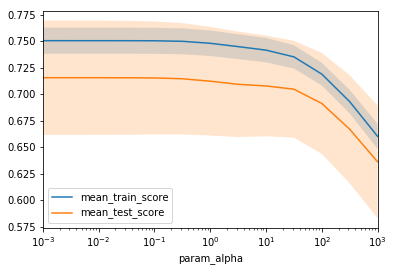

In [88]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("ridge_alpha_search.png")

In [89]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.7157213687576632


In [90]:
grid.score(X_test, y_test)

0.6839497512999744

## Lasso Regression: The syntax
#### Import the class containing the regression method
#### Create an instance of the class
#### Fit the instance on the data and then predict the expected value

In [92]:
from sklearn.linear_model import Lasso
LR = Lasso(alpha=1.0)
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

In [94]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Training set score: 0.69
Test set score: 0.65
Mean squared error: 24.43
Variance score: 0.65


## Grid-Search with Cross-Validation

In [95]:
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

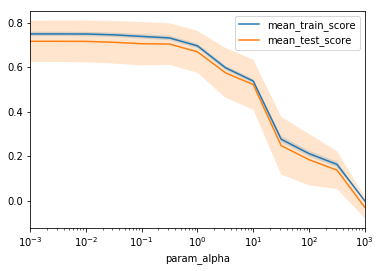

In [96]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("lasso_alpha_search.png")

In [97]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.7160656236129459


In [98]:
grid.score(X_test, y_test)

0.6838467276120774